In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'SimHei'

In [2]:
# 导入数据
df = pd.read_excel(r'E:\datas\A120101.xlsx')

In [3]:
# 查看数据字段信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 15 columns):
ID            8773 non-null int64
年份            8773 non-null int64
省份            8773 non-null object
作物类型          8773 non-null object
单位亩产_公斤       8698 non-null float64
种植面积_万亩       8772 non-null float64
总产量_万吨        8695 non-null float64
亩产的增长速度（%）    8510 non-null float64
面积的增长速度（%）    8588 non-null float64
产量的增长速度（%）    8513 non-null float64
面积占粮食比重（%）    6986 non-null float64
产量占粮食比重（%）    6921 non-null float64
亩产相当于全国的％     62 non-null object
面积占全国平均水平％    62 non-null object
产量占全国％        62 non-null object
dtypes: float64(8), int64(2), object(5)
memory usage: 1.0+ MB


In [4]:
# 数据大小
df.shape

(8773, 15)

> 总共8773条数据，15个字段,部分数据有缺失

In [5]:
# 查看数据样貌（前三条，后三条数据）
df.head(3).append(df.tail(3))

,ID,年份,省份,作物类型,单位亩产_公斤,种植面积_万亩,总产量_万吨,亩产的增长速度（%）,面积的增长速度（%）,产量的增长速度（%）,面积占粮食比重（%）,产量占粮食比重（%）,亩产相当于全国的％,面积占全国平均水平％,产量占全国％
0,1,1959,上海,大豆,144.51,17.3,2.5,-0.005437,0.478632,0.470588,0.035306,0.022727,NaN,NaN,NaN
1,2,1959,江苏,大豆,59.28,860.3,51.0,-0.015282,0.056880,0.040816,0.093349,0.051385,NaN,NaN,NaN
2,3,1959,浙江,大豆,70.62,141.6,10.0,0.399802,-0.084088,0.282051,0.030153,0.012837,NaN,NaN,NaN
8770,8771,2007,云南,芝麻,69.30,0.3,0.0,0.373789,-0.333333,-1.000000,0.000050,0.000000,NaN,NaN,NaN
8771,8772,2007,陕西,芝麻,22.20,1.6,72.7,-0.019868,0.047875,0.078430,0.000344,0.068078,NaN,NaN,NaN
8772,8773,2007,新疆,芝麻,80.90,1.0,0.1,-0.212013,1.222222,1.164502,0.000483,0.000115,NaN,NaN,NaN


### 数据清洗

In [6]:
# 由于最后三列缺失严重，所以直接删除
df = df.iloc[:,:-3]

In [7]:
df.head()

,ID,年份,省份,作物类型,单位亩产_公斤,种植面积_万亩,总产量_万吨,亩产的增长速度（%）,面积的增长速度（%）,产量的增长速度（%）,面积占粮食比重（%）,产量占粮食比重（%）
0,1,1959,上海,大豆,144.51,17.3,2.5,-0.005437,0.478632,0.470588,0.035306,0.022727
1,2,1959,江苏,大豆,59.28,860.3,51.0,-0.015282,0.056880,0.040816,0.093349,0.051385
2,3,1959,浙江,大豆,70.62,141.6,10.0,0.399802,-0.084088,0.282051,0.030153,0.012837
3,4,1959,安徽,大豆,34.07,860.0,29.3,-0.308644,0.031175,-0.287105,0.073737,0.041797
4,5,1959,福建,大豆,53.47,101.0,5.4,0.088780,-0.098214,-0.018182,0.037701,0.013500


In [8]:
# 看看有哪几类作物
df['作物类型'].unique()

array(['大豆', '稻谷', '粮食', '小麦', '玉米', '豆类', '高粱', '谷子', '花生', '油菜籽', '油料',
       '芝麻'], dtype=object)

### 时间序列分析

#### 1.四大作物随时间变化

In [9]:
df4 = df[((df['作物类型']=='大豆')|(df['作物类型']=='小麦')|(df['作物类型']=='玉米')|(df['作物类型']=='稻谷'))&(df['省份']=='全国')]

In [10]:
# 按照年份分组
df4_year_grouped = df4.groupby('年份')

Text(0.5,1,'全国四大作物单位亩产')

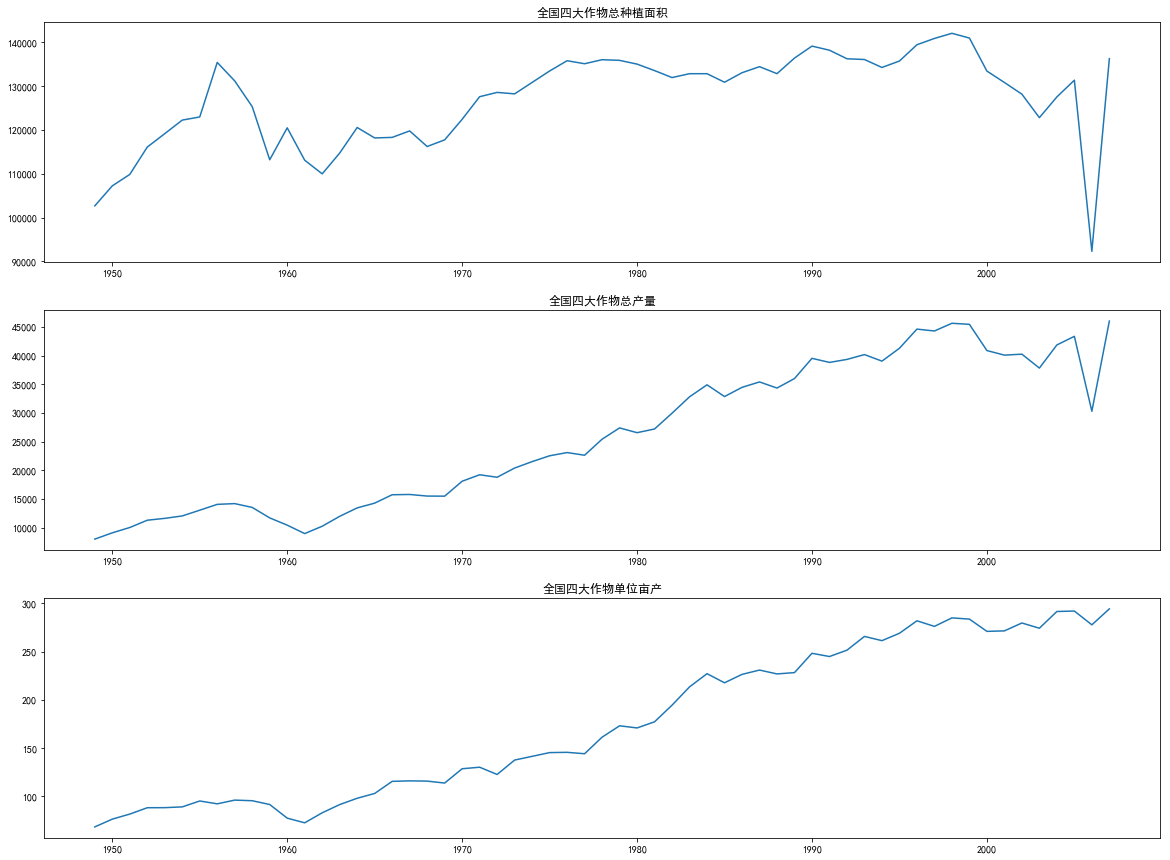

In [11]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df4_year_grouped.种植面积_万亩.sum())
ax1.set_title('全国四大作物总种植面积')
ax2 = fig.add_subplot(3,1,2)
ax2.plot(df4_year_grouped.总产量_万吨.sum())
ax2.set_title('全国四大作物总产量')
ax3 = fig.add_subplot(3,1,3)
ax3.plot(df4_year_grouped.单位亩产_公斤.mean())
ax3.set_title('全国四大作物单位亩产')

- 改革开放后四大作物种植面积在12万-14万(万亩)之间波动
- 四大作物中产量随着年份逐渐上升
- 四大作物单位亩产随着年份逐渐上升

In [12]:
# 2006年出现明显下降，查看一下下降原因
df4_year_grouped.get_group(2006)
# 原来是2006年没有统计玉米

,ID,年份,省份,作物类型,单位亩产_公斤,种植面积_万亩,总产量_万吨,亩产的增长速度（%）,面积的增长速度（%）,产量的增长速度（%）,面积占粮食比重（%）,产量占粮食比重（%）
8294,8295,2006,全国,大豆,114.704224,13920.15,1596.7,0.009405,-0.032406,-0.023306,0.087972,0.032096
8325,8326,2006,全国,稻谷,415.479880,43942.20,18257.1,-0.004481,0.015509,0.010958,0.277705,0.366993
8356,8357,2006,全国,小麦,303.300583,34442.40,10446.4,0.064131,0.007424,0.072030,0.217668,0.209987


#### 2.单类作物随时间变化

In [13]:
xm = df[(df['作物类型']=='小麦')&(df['省份']=='全国')].groupby('年份')
dd = df[(df['作物类型']=='大豆')&(df['省份']=='全国')].groupby('年份')
ym = df[(df['作物类型']=='玉米')&(df['省份']=='全国')].groupby('年份')
dg = df[(df['作物类型']=='稻谷')&(df['省份']=='全国')].groupby('年份')

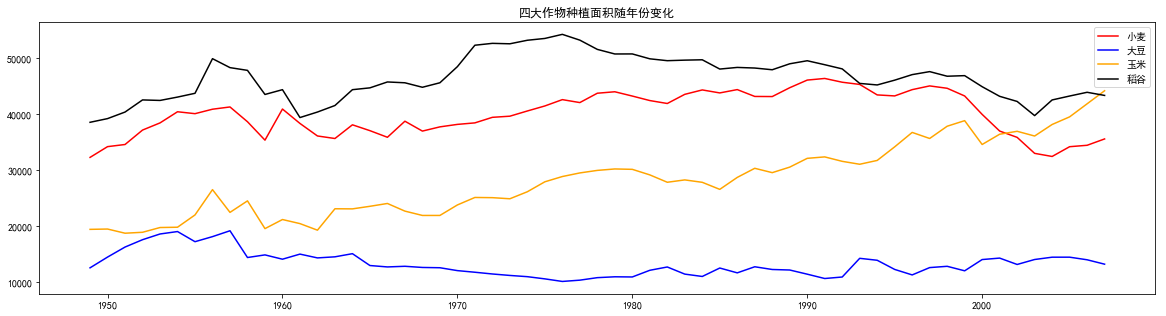

In [14]:
# 种植面积
plt.figure(figsize=(20,5))
p1 = plt.plot(xm.种植面积_万亩.sum(),c='red',label='小麦')
p2 = plt.plot(dd.种植面积_万亩.sum(),c='blue',label='大豆')
p3 = plt.plot(ym.种植面积_万亩.sum(),c='orange',label='玉米')
p4 = plt.plot(dg.种植面积_万亩.sum(),c='black',label='稻谷')
plt.legend()
plt.title('四大作物种植面积随年份变化')
plt.show()

- 总的种植面积上看稻谷>小麦>玉米>大豆
- 从1998年开始小麦稻谷种植面积逐渐减少
- 玉米种植面积一直逐年攀升

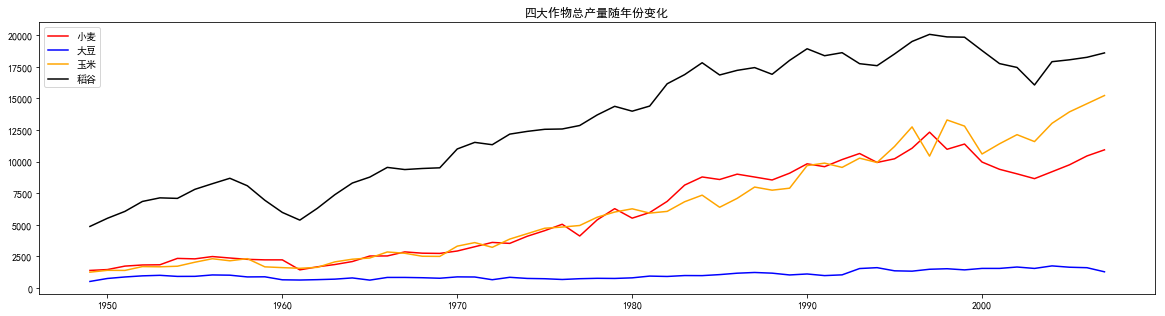

In [15]:
# 总产量
plt.figure(figsize=(20,5))
p1 = plt.plot(xm.总产量_万吨.sum(),c='red',label='小麦')
p2 = plt.plot(dd.总产量_万吨.sum(),c='blue',label='大豆')
p3 = plt.plot(ym.总产量_万吨.sum(),c='orange',label='玉米')
p4 = plt.plot(dg.总产量_万吨.sum(),c='black',label='稻谷')
plt.legend()
plt.title('四大作物总产量随年份变化')
plt.show()

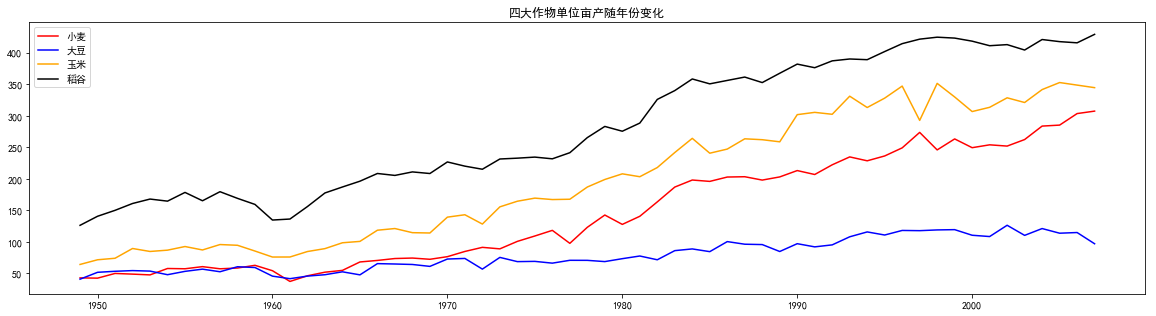

In [16]:
# 单位亩产
plt.figure(figsize=(20,5))
p1 = plt.plot(xm.单位亩产_公斤.sum(),c='red',label='小麦')
p2 = plt.plot(dd.单位亩产_公斤.sum(),c='blue',label='大豆')
p3 = plt.plot(ym.单位亩产_公斤.sum(),c='orange',label='玉米')
p4 = plt.plot(dg.单位亩产_公斤.sum(),c='black',label='稻谷')
plt.legend()
plt.title('四大作物单位亩产随年份变化')
plt.show()

- 四大作物单位亩产均随着年份增加而增长
- 大豆增长幅度相比其他三种比较小

### 省份分析

#### 1.看看全国各地四大粮种植面积

In [22]:
df_sh = df[((df['作物类型']=='大豆')|(df['作物类型']=='小麦')|(df['作物类型']=='玉米')|(df['作物类型']=='稻谷'))&(df['省份']!='全国')&(df['年份']==2007)]
df_sh_grouped = df_sh.groupby('省份')

In [39]:
df_table = df_sh.pivot_table(index='省份',values='种植面积_万亩',aggfunc='sum')
df_table.sort_values(by='种植面积_万亩',ascending=True,inplace=True)

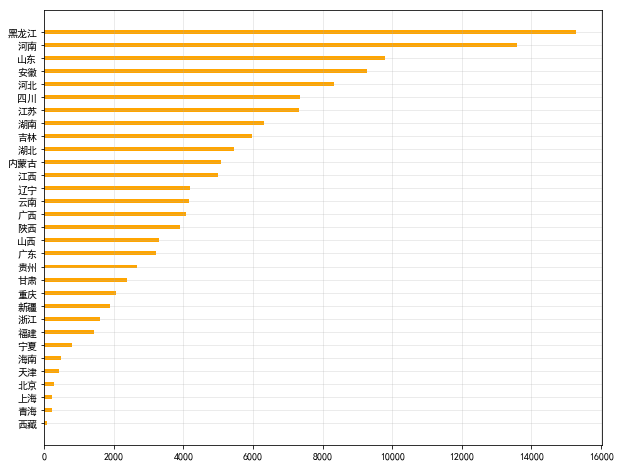

In [51]:
plt.figure(figsize=(10,8))
plt.barh(range(len(df_table)),df_table['种植面积_万亩'],height=0.3,color='orange') #x轴，y轴必须是数字不能是字符串
plt.yticks(range(len(df_table)),list(df_table.index))
plt.grid(alpha=0.3)
plt.show()

- 黑龙江和河南作为粮食大省，种植面积远远超过其他省
- 西藏虽然地广但是高原气候不适合种植传统作物,所以排在最后

#### 2.看看各省单种作物种植面积排名

In [52]:
xm = df[(df['作物类型']=='小麦')&(df['省份']!='全国')&(df['年份']==2007)]
dd = df[(df['作物类型']=='大豆')&(df['省份']!='全国')&(df['年份']==2007)]
ym = df[(df['作物类型']=='玉米')&(df['省份']!='全国')&(df['年份']==2007)]
dg = df[(df['作物类型']=='稻谷')&(df['省份']!='全国')&(df['年份']==2007)]

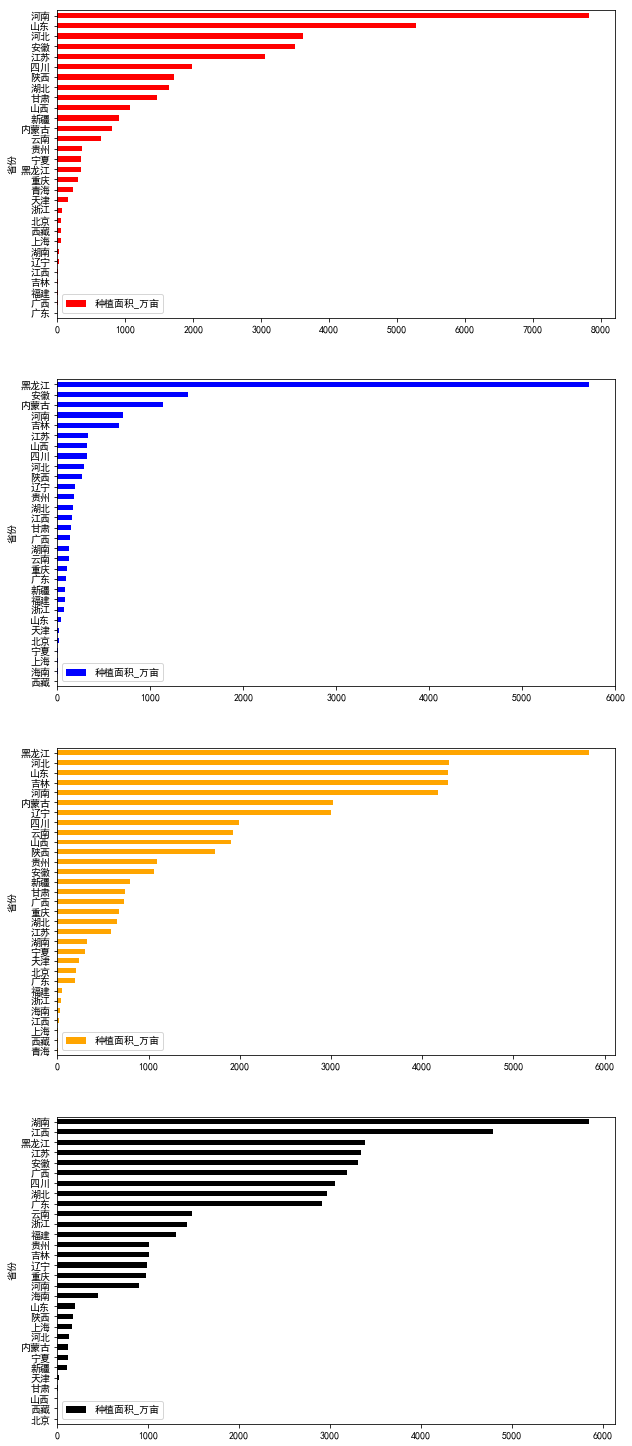

In [70]:
fig, axes = plt.subplots(4, 1,figsize=(10,26))
# data.plot.barh(ax=axes[1], color='g', alpha=0.7)
xm[['省份','种植面积_万亩']].set_index('省份').sort_values(by='种植面积_万亩',ascending=True).plot.barh(ax=axes[0],color='red')
dd[['省份','种植面积_万亩']].set_index('省份').sort_values(by='种植面积_万亩',ascending=True).plot.barh(ax=axes[1],color='blue')
ym[['省份','种植面积_万亩']].set_index('省份').sort_values(by='种植面积_万亩',ascending=True).plot.barh(ax=axes[2],color='orange')
dg[['省份','种植面积_万亩']].set_index('省份').sort_values(by='种植面积_万亩',ascending=True).plot.barh(ax=axes[3],color='black')

- 河南地处中原，适合小麦生长，小麦种植面积居全国之首
- 黑龙江黑土地肥沃，玉米大豆种植面积远超他省，尤其大豆
- 湖南地处南方且多湖多水稻谷种植面积最广

In [79]:
# 看一下2007年黑龙江大豆种植面积占全国种植面积的比例
(df.query("年份==2007&省份=='黑龙江'&作物类型=='大豆'")['种植面积_万亩'].values)/(df.query("年份==2007&省份=='全国'&作物类型=='大豆'")['种植面积_万亩'].values)

array([0.43510247])

> 2007年黑龙江大豆种植面积占全国的43.5%